# ASSET PRICING TESTS

Use the sample of 10 stocks and implement some asset pricing tests

## A. Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

---
## B. Data Preprocessing

__Metadata:__
- The data begins at __Jan, 2001__ and ends at __Dec, 2020__ (20 year span)
- The `return` of each stock is the _holding period return_ for a sale of security on the given day, taking into account and reinvesting all the distributions to shareholders (dividends)
- The `marketcap` of each stock is the _market capitalization_ calculated as the stock price multiplied by the share outstanding. The CRSP database uses the _closing price_ or the absolute value of _bid/ask average_

### Monthly Stock Data

In [2]:
stocks = pd.read_csv('monthlystocks.csv')
stocks.head(3)
#stocks.info()

,PERMNO,date,TICKER,PRC,RET,SHROUT
0,10107,20000131,MSFT,97.875,-0.161670,5160025.0
1,10107,20000229,MSFT,89.375,-0.086845,5160025.0
2,10107,20000331,MSFT,106.250,0.188811,5242000.0


In [3]:
#stocks.TICKER.unique()

In [4]:
tickers = ['BA', 'COST', 'CVX', 'DD', 'HAL', 'INTC', 'MSFT', 'OSK', 'PG', 'VZ']
tickers_ext = ['BA', 'BEL', 'COST', 'CVX', 'CHV', 'DD', 'DWDP', 'HAL', 'INTC', 'MSFT', 'OSK', 'OTRKB', 'PG', 'VZ']

In [5]:
#Rename columns
stocks.columns = ['permno','date', 'ticker', 'price', 'r', 'vol']
stocks.head()

,permno,date,ticker,price,r,vol
0,10107,20000131,MSFT,97.8750,-0.161670,5160025.0
1,10107,20000229,MSFT,89.3750,-0.086845,5160025.0
2,10107,20000331,MSFT,106.2500,0.188811,5242000.0
3,10107,20000428,MSFT,69.7500,-0.343529,5262405.0
4,10107,20000531,MSFT,62.5625,-0.103047,5262405.0


In [6]:
#pd.to_numeric(stocks.r)

We detect a string `C` in the `return` column --> set the value to `NaN` 

In [7]:
stocks.r.iat[718] = np.nan
stocks.r[716:719]

716    -0.031315
717          NaN
718          NaN
Name: r, dtype: object

In [8]:
stocks.r = pd.to_numeric(stocks.r)

In [9]:
#stocks.r.iloc[1]

In [10]:
stocks = stocks.pivot_table(columns = 'ticker',
                            index = 'date',
                            values = ['r','price', 'vol'])

In [11]:
stocks[10:13]

price                                                           \
ticker         BA BEL      CHV     COST CVX       DD DWDP     HAL     INTC   
date                                                                         
20001130  69.0625 NaN  81.8750  32.6250 NaN  42.3125  NaN  33.375  38.0625   
20001229  66.0000 NaN  84.4375  39.9375 NaN  48.3125  NaN  36.250  30.0625   
20010131  58.5000 NaN  83.2800  46.2500 NaN  43.7100  NaN  41.190  37.0000   

                   ... vol                                                  \
ticker       MSFT  ... CVX         DD DWDP       HAL       INTC       MSFT   
date               ...                                                       
20001130  57.3750  ... NaN  1042578.0  NaN  445531.0  6730000.0  5332338.0   
20001229  43.3750  ... NaN  1042578.0  NaN  445531.0  6721000.0  5332338.0   
20010131  61.0625  ... NaN  1042578.0  NaN  445531.0  6721000.0  5335391.0   

                                             
ticker   OSK    OTRKB         PG         VZ  
date                                         
20001130 NaN  16246.0  1303780.0  2699097.0  
20001229 NaN  16252.0  1303780.0  2699097.0  
20010131 NaN  16252.0  1303780.0  2699097.0  

[3 rows x 42 columns]

In [12]:
stocks = stocks.reset_index()
stocks

date      price                                                    \
ticker                   BA      BEL      CHV       COST    CVX       DD DWDP   
0       20000131   44.50000  61.9375  83.6250   48.93750    NaN  59.0000  NaN   
1       20000229   36.93750  48.9375  74.6875   49.62500    NaN  50.5000  NaN   
2       20000331   37.81250  61.1250  92.4375   52.56250    NaN  52.9375  NaN   
3       20000428   39.68750  59.2500  85.1250   54.06250    NaN  47.4375  NaN   
4       20000531   39.06250  52.8750  92.4375   31.93750    NaN  49.0000  NaN   
..           ...        ...      ...      ...        ...    ...      ...  ...   
247     20200831  171.82001      NaN      NaN  347.66000  83.93  55.7600  NaN   
248     20200930  165.25999      NaN      NaN  355.00000  72.00  55.4800  NaN   
249     20201030  144.39000      NaN      NaN  357.62000  69.50  56.8800  NaN   
250     20201130  210.71001      NaN      NaN  391.76999  87.18  63.4400  NaN   
251     20201231  214.06000      NaN      NaN  376.78000  84.45  71.1100  NaN   

                           ...        vol                            \
ticker      HAL      INTC  ...        CVX         DD DWDP       HAL   
0       36.1250   98.9375  ...        NaN  1043131.0  NaN  441754.0   
1       38.1875  113.0000  ...        NaN  1043131.0  NaN  441754.0   
2       41.1250  131.9375  ...        NaN  1052473.0  NaN  443583.0   
3       44.1875  126.8125  ...        NaN  1052473.0  NaN  443724.0   
4       50.9375  124.6875  ...        NaN  1047312.0  NaN  443933.0   
..          ...       ...  ...        ...        ...  ...       ...   
247     16.1800   50.9500  ...  1867323.0   733828.0  NaN  878470.0   
248     12.0500   51.7800  ...  1867323.0   733828.0  NaN  878470.0   
249     12.0600   44.2800  ...  1925052.0   733850.0  NaN  884007.0   
250     16.5900   48.3500  ...  1925052.0   733850.0  NaN  884007.0   
251     18.9000   49.8200  ...  1925052.0   734161.0  NaN  884007.0   

                                                                      
ticker       INTC       MSFT      OSK    OTRKB         PG         VZ  
0       3341000.0  5160025.0      NaN  16201.0  1315714.0        NaN  
1       3341000.0  5160025.0      NaN  16201.0  1315714.0        NaN  
2       3349000.0  5242000.0      NaN  16206.0  1315714.0        NaN  
3       3349000.0  5262405.0      NaN  16206.0  1315714.0        NaN  
4       3349000.0  5262405.0      NaN  16206.0  1307893.0        NaN  
..            ...        ...      ...      ...        ...        ...  
247     4253000.0  7567653.0  68106.0      NaN  2486087.0  4138054.0  
248     4098000.0  7564000.0  68106.0      NaN  2489621.0  4138054.0  
249     4098000.0  7560496.0  68106.0      NaN  2479606.0  4138094.0  
250     4098000.0  7560496.0  68190.0      NaN  2479606.0  4138094.0  
251     4062000.0  7546000.0  68190.0      NaN  2479606.0  4138094.0  

[252 rows x 43 columns]

In [13]:
#stocks.date.loc[12]

In [14]:
r_stocks = stocks.r.loc[12:].reset_index(drop = True)
r_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      240 non-null    float64
 1   BEL     0 non-null      float64
 2   CHV     9 non-null      float64
 3   COST    240 non-null    float64
 4   CVX     231 non-null    float64
 5   DD      219 non-null    float64
 6   DWDP    20 non-null     float64
 7   HAL     240 non-null    float64
 8   INTC    240 non-null    float64
 9   MSFT    240 non-null    float64
 10  OSK     222 non-null    float64
 11  OTRKB   18 non-null     float64
 12  PG      240 non-null    float64
 13  VZ      240 non-null    float64
dtypes: float64(14)
memory usage: 26.4 KB


In [15]:
#Combine CHV and CVX
r_stocks.CVX = r_stocks.CVX.combine_first(r_stocks.CHV)

In [16]:
#Combine DD and DWDP
r_stocks.DD = r_stocks.DD.combine_first(r_stocks.DWDP)

In [17]:
#Combine OSK and OTRKB
r_stocks.OSK = r_stocks.OSK.combine_first(r_stocks.OTRKB)

In [18]:
#Check missing value
print(r_stocks.CVX.notna().value_counts(), end = '\n-------\n')
print(r_stocks.DD.notna().value_counts(), end = '\n-------\n')
print(r_stocks.OSK.notna().value_counts())

True    240
Name: CVX, dtype: int64
-------
True     239
False      1
Name: DD, dtype: int64
-------
True    240
Name: OSK, dtype: int64


In [19]:
r_stocks.DD.iat[200] = r_stocks.DD.iat[200-1]

In [20]:
r_stocks = r_stocks[tickers]
r_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      240 non-null    float64
 1   COST    240 non-null    float64
 2   CVX     240 non-null    float64
 3   DD      240 non-null    float64
 4   HAL     240 non-null    float64
 5   INTC    240 non-null    float64
 6   MSFT    240 non-null    float64
 7   OSK     240 non-null    float64
 8   PG      240 non-null    float64
 9   VZ      240 non-null    float64
dtypes: float64(10)
memory usage: 18.9 KB


- The `r_stocks` dataframe contains the monthly return of 10 stocks

---
### Book value data

In [21]:
bv = pd.read_csv('bookvalue.csv')
bv.head(3)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,bkvlps,costat
0,2136,20011231,2001,INDL,C,D,STD,VZ,USD,11.9784,A
1,2136,20021231,2002,INDL,C,D,STD,VZ,USD,11.8905,A
2,2136,20031231,2003,INDL,C,D,STD,VZ,USD,12.0914,A


In [22]:
bv = bv.rename(columns = {'tic': "ticker"})

In [23]:
bv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     210 non-null    int64  
 1   datadate  210 non-null    int64  
 2   fyear     210 non-null    int64  
 3   indfmt    210 non-null    object 
 4   consol    210 non-null    object 
 5   popsrc    210 non-null    object 
 6   datafmt   210 non-null    object 
 7   ticker    210 non-null    object 
 8   curcd     210 non-null    object 
 9   bkvlps    210 non-null    float64
 10  costat    210 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 18.2+ KB


In [24]:
#bv

In [25]:
bookvalue = bv.pivot(columns = 'ticker', values = 'bkvlps', index = 'datadate').reset_index()
bookvalue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datadate  84 non-null     int64  
 1   BA        21 non-null     float64
 2   COST      21 non-null     float64
 3   CVX       21 non-null     float64
 4   DD        21 non-null     float64
 5   HAL       21 non-null     float64
 6   INTC      21 non-null     float64
 7   MSFT      21 non-null     float64
 8   OSK       21 non-null     float64
 9   PG        21 non-null     float64
 10  VZ        21 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 7.3 KB


In [26]:
#bookvalue[:10]

In [27]:
bookvalue = bookvalue.drop('datadate', axis = 1)
bookvalue.head(3)

ticker,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ
0,NaN,NaN,NaN,NaN,NaN,NaN,8.7849,NaN,9.0173,NaN
1,NaN,10.8088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7614,NaN,NaN


'Patching' the missing data

In [28]:
for i in range(3, len(bookvalue), 4):
    for j in range(1, 4):
        bookvalue.iloc[i] = bookvalue.iloc[i].combine_first(bookvalue.iloc[i-j])    

In [29]:
annual_bv = bookvalue.dropna()
annual_bv.reset_index()

ticker,index,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ
0,3,13.5671,10.8088,31.8191,11.0440,10.9493,5.3558,8.7849,20.7614,9.0173,11.9784
1,7,9.6241,12.5059,29.5880,8.3558,8.1606,5.3944,9.7369,24.1319,10.3100,11.8905
2,11,10.1702,14.3285,33.9476,9.8927,5.8018,5.8341,5.6652,14.8846,12.2680,12.0914
3,15,14.2284,16.4812,21.4653,12.8761,8.8959,6.1697,6.8887,17.9992,6.6966,13.5613
4,19,14.5403,18.7968,28.0720,15.8444,12.3969,6.1129,4.4925,11.1570,6.9768,14.3591
5,23,6.2533,19.7790,31.8471,17.8122,7.3908,6.3739,3.9857,14.3985,19.7386,16.6701
6,27,12.2224,19.7325,36.8766,20.6185,7.8023,7.3499,3.3152,18.7796,21.2848,17.5822
7,31,-1.8535,21.2527,43.2325,14.6168,8.6313,7.0277,3.9652,18.6567,22.9014,14.6825
8,35,2.9300,22.9784,45.7802,14.3929,9.6763,7.5510,4.4407,5.7486,21.6370,14.6724
9,39,3.7619,24.9798,52.3447,15.2834,11.3989,8.9693,5.3271,14.6324,21.5186,13.6430


Assuming that the book value per share for all 12 months in the same year are the same, we convert the annual book value into monthly book value

Create a new dataframe named `monthly_bvps`
- with index as the index of monthly stock 
- contains the data of monthly book value of 10 chosen stocks

In [30]:
mbv = pd.DataFrame(columns = tickers)
mbv

,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ


In [31]:
monthly_bvps = pd.DataFrame(index = r_stocks.index, columns = tickers)
monthly_bvps

,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
for i in range(0, len(monthly_bvps), 12):
    monthly_bvps.iloc[i: i+12] = annual_bv[tickers].iloc[int(i/12)]/12
    #print(f'{i/12}\t{i+11}')

In [33]:
monthly_bvps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BA      240 non-null    object
 1   COST    240 non-null    object
 2   CVX     240 non-null    object
 3   DD      240 non-null    object
 4   HAL     240 non-null    object
 5   INTC    240 non-null    object
 6   MSFT    240 non-null    object
 7   OSK     240 non-null    object
 8   PG      240 non-null    object
 9   VZ      240 non-null    object
dtypes: object(10)
memory usage: 18.9+ KB


In [34]:
for stock in tickers:
    monthly_bvps[stock] = pd.to_numeric(monthly_bvps[stock])

In [35]:
monthly_bvps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      240 non-null    float64
 1   COST    240 non-null    float64
 2   CVX     240 non-null    float64
 3   DD      240 non-null    float64
 4   HAL     240 non-null    float64
 5   INTC    240 non-null    float64
 6   MSFT    240 non-null    float64
 7   OSK     240 non-null    float64
 8   PG      240 non-null    float64
 9   VZ      240 non-null    float64
dtypes: float64(10)
memory usage: 18.9 KB


#### Monthly Total Book Value of Equity

Total BE = Monthly BV * Number of Shares Outstanding

In [36]:
shrout = stocks.vol[tickers_ext][12:]
shrout = shrout.reset_index(drop = True)
shrout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      240 non-null    float64
 1   BEL     0 non-null      float64
 2   COST    240 non-null    float64
 3   CVX     231 non-null    float64
 4   CHV     9 non-null      float64
 5   DD      219 non-null    float64
 6   DWDP    21 non-null     float64
 7   HAL     240 non-null    float64
 8   INTC    240 non-null    float64
 9   MSFT    240 non-null    float64
 10  OSK     222 non-null    float64
 11  OTRKB   18 non-null     float64
 12  PG      240 non-null    float64
 13  VZ      240 non-null    float64
dtypes: float64(14)
memory usage: 26.4 KB


In [37]:
shrout.CVX = shrout.CVX.combine_first(shrout.CHV)
shrout.CVX.notna().value_counts()

True    240
Name: CVX, dtype: int64

In [38]:
shrout.BA = shrout.BA.combine_first(shrout.BEL)
shrout.BA.notna().value_counts()

True    240
Name: BA, dtype: int64

In [39]:
shrout.DD = shrout.DD.combine_first(shrout.DWDP)
shrout.DD.notna().value_counts()

True    240
Name: DD, dtype: int64

In [40]:
shrout.OSK = shrout.OSK.combine_first(shrout.OTRKB)
shrout.OSK.notna().value_counts()

True    240
Name: OSK, dtype: int64

In [41]:
shrout = shrout.dropna(axis = 1)

In [42]:
shrout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      240 non-null    float64
 1   COST    240 non-null    float64
 2   CVX     240 non-null    float64
 3   DD      240 non-null    float64
 4   HAL     240 non-null    float64
 5   INTC    240 non-null    float64
 6   MSFT    240 non-null    float64
 7   OSK     240 non-null    float64
 8   PG      240 non-null    float64
 9   VZ      240 non-null    float64
dtypes: float64(10)
memory usage: 18.9 KB


In [43]:
be = monthly_bvps[tickers]*shrout
#be

In [44]:
be.describe()

,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,240.000000,2.400000e+02,2.400000e+02
mean,3.506196e+05,8.722091e+05,8.593765e+06,2.080302e+06,7.317939e+05,4.379207e+06,5.397395e+06,124322.747934,4.126689e+06,3.255532e+06
std,6.196752e+05,2.569091e+05,3.881708e+06,2.180002e+06,3.489387e+05,1.280397e+06,1.898809e+06,67559.358178,1.765143e+06,1.101143e+06
min,-1.479704e+06,4.036204e+05,1.699922e+06,6.914104e+05,2.109921e+05,2.978158e+06,2.526062e+06,20643.699817,7.172611e+05,7.059123e+05
25%,5.878506e+04,7.398401e+05,5.652075e+06,1.087428e+06,4.114387e+05,3.219414e+06,3.892692e+06,51656.204067,3.406215e+06,2.734035e+06
50%,4.507848e+05,8.938165e+05,9.473083e+06,1.223094e+06,6.771125e+05,4.128494e+06,5.315468e+06,124170.282000,4.942312e+06,3.230478e+06
75%,7.731906e+05,1.015137e+06,1.220878e+07,1.563351e+06,9.259477e+05,5.217268e+06,6.616745e+06,176125.629150,5.434796e+06,3.700185e+06
max,1.258329e+06,1.529538e+06,1.321814e+07,1.061002e+07,1.360168e+06,7.110619e+06,9.904277e+06,238112.721000,5.926957e+06,5.656068e+06


#### Monthly Total Market Value of Equity

Total Market Value of Equity = Price * Number of Shares Outstanding

In [45]:
price = stocks.price[12:].reset_index(drop = True)
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      240 non-null    float64
 1   BEL     0 non-null      float64
 2   CHV     9 non-null      float64
 3   COST    240 non-null    float64
 4   CVX     231 non-null    float64
 5   DD      219 non-null    float64
 6   DWDP    21 non-null     float64
 7   HAL     240 non-null    float64
 8   INTC    240 non-null    float64
 9   MSFT    240 non-null    float64
 10  OSK     222 non-null    float64
 11  OTRKB   18 non-null     float64
 12  PG      240 non-null    float64
 13  VZ      240 non-null    float64
dtypes: float64(14)
memory usage: 26.4 KB


In [46]:
price.BA = price.BA.combine_first(price.BEL)
price.BA.notna().value_counts()

True    240
Name: BA, dtype: int64

In [47]:
price.DD = price.BA.combine_first(price.DWDP)
price.DD.notna().value_counts()

True    240
Name: DD, dtype: int64

In [48]:
price.CVX = price.BA.combine_first(price.CHV)
price.CVX.notna().value_counts()

True    240
Name: CVX, dtype: int64

In [49]:
price.OSK = price.BA.combine_first(price.OTRKB)
price.OSK.notna().value_counts()

True    240
Name: OSK, dtype: int64

In [50]:
price = price.dropna(axis = 1)
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      240 non-null    float64
 1   COST    240 non-null    float64
 2   CVX     240 non-null    float64
 3   DD      240 non-null    float64
 4   HAL     240 non-null    float64
 5   INTC    240 non-null    float64
 6   MSFT    240 non-null    float64
 7   OSK     240 non-null    float64
 8   PG      240 non-null    float64
 9   VZ      240 non-null    float64
dtypes: float64(10)
memory usage: 18.9 KB


In [51]:
me = price*shrout
me.describe()

ticker,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,7.854625e+07,4.788336e+07,2.225616e+08,1.467147e+08,2.824572e+07,1.536729e+08,4.224136e+08,8.450753e+06,1.905552e+08,1.448454e+08
std,5.114181e+07,3.566888e+07,1.858117e+08,2.061045e+08,1.270614e+07,4.471798e+07,3.171901e+08,7.174243e+06,5.474296e+07,5.409388e+07
min,2.004900e+07,1.278983e+07,2.152489e+07,2.495818e+07,5.624629e+06,7.085988e+07,1.435826e+08,4.170736e+05,7.829199e+07,7.486790e+07
25%,4.481452e+07,2.217663e+07,1.085991e+08,5.630021e+07,1.685023e+07,1.184920e+08,2.577085e+08,3.170659e+06,1.480261e+08,1.001831e+08
50%,5.921913e+07,3.144071e+07,1.639086e+08,7.190567e+07,3.038718e+07,1.429187e+08,2.916549e+08,6.539107e+06,1.948032e+08,1.247860e+08
75%,9.409521e+07,6.591363e+07,2.626908e+08,1.209604e+08,3.755027e+07,1.804427e+08,4.059702e+08,1.083342e+07,2.202286e+08,1.990045e+08
max,2.485708e+08,1.735365e+08,8.359517e+08,9.920051e+08,5.996937e+07,2.734286e+08,1.706733e+09,3.081788e+07,3.460324e+08,2.539371e+08


---
## C. Modeling

### Question 1: Correlation between Market beta and the Risk Premium

#### Step 1: Estimate the beta of each individual stock

Sharpe - Leitner CAPM: __r_it - r_ft = alpha_i + beta_im*(r_mt - r_ft) + epsilon_it__

To estimate the beta of each stock we will need the following data:
- Time series of __return on market portfolio__ -> we use monthly return on S&P500
- Time series of __riskfree return__ -> we use the monthly return on 3-month-Tbill

Hyperparameters:
- Number of observations to derive each beta: `obs = 60`
- Number of beta's to get: `nb = 180`

Implement univariate linear regression by `scipy.stats` libraries

In [52]:
#Hyperparameters
obs = 60
nb = 180

In [53]:
rates = pd.read_excel('hw5data.xlsx')
rates.head(3)

,Date,r_MSFT,r_CVX,r_PG,r_BA,r_INTC,r_VZ,r_HAL,r_OSK,r_COST,...,me_PG,me_BA,me_INTC,me_VZ,me_HAL,me_OSK,me_COST,me_DD,rf,rm
0,36922,0.407781,-0.013708,-0.079649,-0.113636,0.230769,0.103940,0.136276,0.045989,0.158059,...,9.366355e+07,5.197427e+07,248677000.0,1.483154e+08,4.878253e+06,264127504,4.843445e+06,1.151423e+07,0.006900,0.038787
1,36950,-0.033777,0.036383,-0.018653,0.066154,-0.227500,-0.099181,-0.030226,0.065306,-0.097297,...,9.191649e+07,5.526153e+07,191882875.0,1.336053e+08,4.878253e+06,264127504,4.861787e+06,1.151423e+07,0.003967,-0.100183
2,36980,-0.073093,0.024982,-0.112057,-0.104341,-0.078775,-0.004040,-0.077097,-0.274585,-0.059880,...,8.161663e+07,4.869410e+07,176951562.5,1.332855e+08,4.691425e+06,264647824,4.864165e+06,1.151557e+07,0.004678,-0.071364


In [54]:
rates = rates[['rf', 'rm']]
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rf      240 non-null    float64
 1   rm      240 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [55]:
r = pd.concat({'stocks': r_stocks, 'market': rates['rm'], 'riskfree': rates['rf']}, axis = 1)

In [56]:
r.head()

stocks                                                              \
         BA      COST       CVX        DD       HAL      INTC      MSFT   
0 -0.113636  0.158059 -0.013708 -0.095265  0.136276  0.230769  0.407781   
1  0.066154 -0.097297  0.036383  0.007550 -0.030226 -0.227500 -0.033777   
2 -0.104341 -0.059880  0.024982 -0.068437 -0.077097 -0.078775 -0.073093   
3  0.109316 -0.110064  0.099772  0.110319  0.175782  0.174727  0.238857   
4  0.020388  0.113942  0.001450  0.034521  0.081694 -0.125526  0.021107   

                                   market  riskfree  
        OSK        PG        VZ        rm        rf  
0  0.045994 -0.079649  0.103940  0.038787  0.006900  
1  0.065306 -0.018653 -0.099181 -0.100183  0.003967  
2 -0.274585 -0.112057 -0.004040 -0.071364  0.004678  
3  0.098028 -0.035144  0.124848  0.082830  0.004470  
4 -0.040630  0.069775 -0.003995  0.009064  0.003853

In [57]:
beta_stocks = pd.DataFrame(index = r.index)
beta_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Empty DataFrame

__Deriving beta at time t of a single stock__

Given that the sample starts at  2001.1 and ends at 2020.12. You will use each batch of 60 observations (from t-60 to t-1) of excess return series to derive the beta at t. For example, the first batch includes excess returns of the stock and of the market portfolio from 2001.1 to 2005.12 --> beta at 2006.1

Therefore, we calculate the inputs using index `i-60` to `i-1` with `i` starting from the 61st observation, which is the index position `60`

In [58]:
n = len(r)
n

240

In [59]:
for stock in tickers:
    
    beta_stocks[stock] = np.nan
    
    for i in range(obs, n):
        rit = r.stocks[stock].iloc[i-obs:i-1]
        rmt = r.market['rm'].iloc[i-obs:i-1]
        rft = r.riskfree['rf'].iloc[i-obs:i-1]
        y = rit - rft
        x = rmt - rft
                
        regt = stats.linregress(x, y)
        betat = regt.slope
        
        beta_stocks[stock].iloc[i] = betat  
    

In [60]:
beta_stocks[beta_stocks.notna()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      180 non-null    float64
 1   COST    180 non-null    float64
 2   CVX     180 non-null    float64
 3   DD      180 non-null    float64
 4   HAL     180 non-null    float64
 5   INTC    180 non-null    float64
 6   MSFT    180 non-null    float64
 7   OSK     180 non-null    float64
 8   PG      180 non-null    float64
 9   VZ      180 non-null    float64
dtypes: float64(10)
memory usage: 18.9 KB


In [61]:
#beta_stocks[beta_stocks.notna()].describe()

___Histogram of betas___

In [62]:
low = '#50C878' #'#93C572'
med = '#F4BB44'
high = '#E34234'

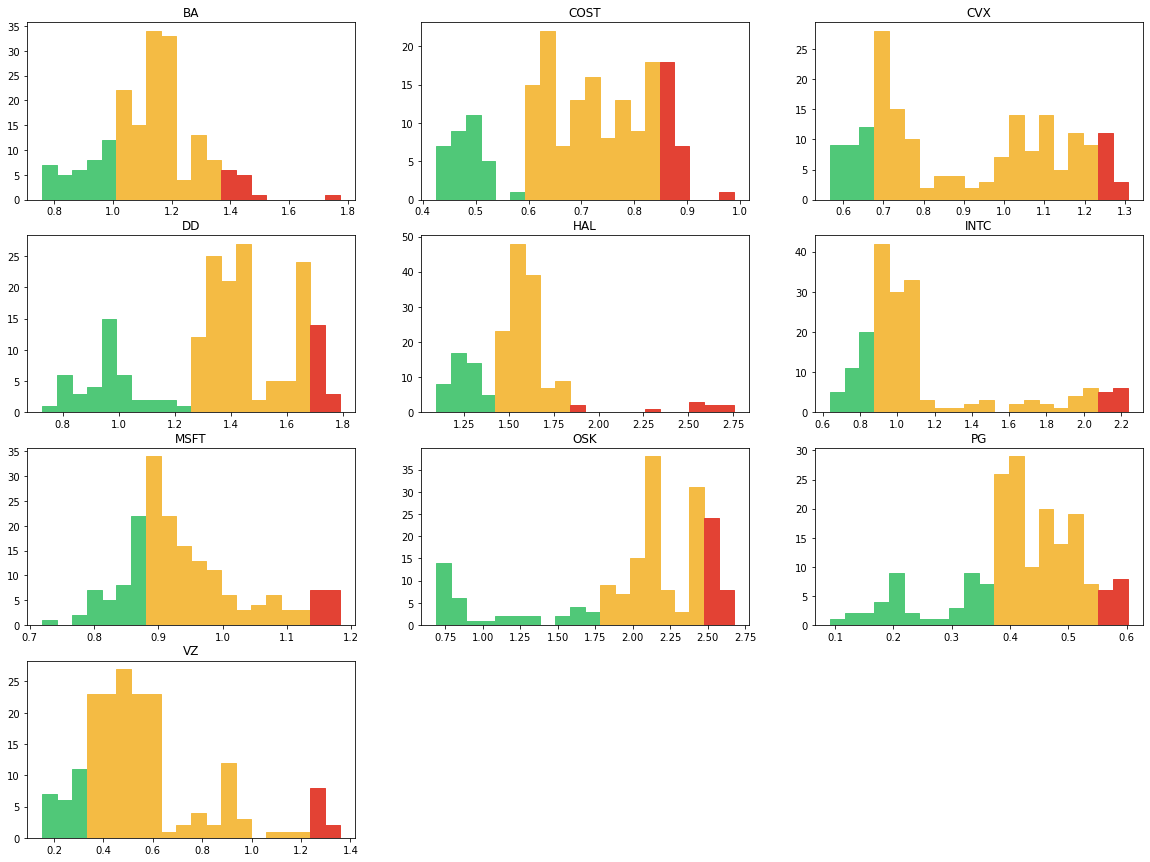

In [64]:
fig = plt.figure()

for i in range(1, 11):
    arr = beta_stocks[tickers[i-1]].iloc[60:]
    ax = fig.add_subplot(4, 3, i)
    a, c = np.percentile(arr, [25, 95])
    
    n, bins, patches = ax.hist(arr, bins = 20)
    ax.set_title(tickers[i-1])
    
    for patches, left, right in zip(patches, bins[1:], bins[:-1]):
        if right < a:
            patches.set_color(low)
        if left > c:
            patches.set_color(high)
        if (left >a) & (left<c):
            patches.set_color(med)


c = 5            
plt.rcParams['figure.figsize'] = (4*c, 3*c)            
plt.show()

---

#### Step 2: Cross section regression

We run the cross section regression to check the correlation between the _excess return of each individual stock_ and _its market beta_
$${r_{i,t} - r_{f,t} = \gamma_{0, t} + \gamma_{1, t}*\hat{\beta}_{im, t} + \delta_{i, t}}$$
Data:
- Dependent variable: 
    - excess return of each individual stock compared to the riskfree return __rit - rft__
- Explanatory variable: market beta of the stock calculated above __beta_stocks__

Output:
- `gamma0`: the intercept of estimated model
- `gamma1`: the slope of the estimated model

In [67]:
n = len(r)

In [68]:
gammas = pd.DataFrame({'gamma0': pd.Series(np.full((nb,), np.nan)),
                       'gamma1': pd.Series(np.full((nb,), np.nan))},
                     index = r.index)
gammas[60:63]

,gamma0,gamma1
60,NaN,NaN
61,NaN,NaN
62,NaN,NaN


In [69]:
#r.stocks.iloc[1]
#beta_stocks.iloc[60]

In [70]:
for t in range(obs, n):
    rit = r.stocks.iloc[t] 
    rft = pd.Series(np.full((r.stocks.iloc[t].shape), r.riskfree.iloc[t]), index = tickers)
    excess_rt = rit - rft
    yt =  excess_rt
    xt = beta_stocks.iloc[t]
    
    regt = stats.linregress(xt, yt)
    gamma0t = regt.intercept
    gamma1t = regt.slope
    
    gammas['gamma0'].iloc[t] = gamma0t
    gammas['gamma1'].iloc[t] = gamma1t

In [71]:
(r.stocks.iloc[60]) - pd.Series(np.full((r.stocks.iloc[60].shape), r.riskfree.iloc[60]), index = tickers)

BA     -0.030689
COST    0.005278
CVX     0.042763
DD     -0.082035
HAL     0.281811
INTC   -0.151650
MSFT    0.073270
OSK     0.102641
PG      0.024950
VZ      0.061363
dtype: float64

In [72]:
gammas.iloc[[60, 180]]

,gamma0,gamma1
60,0.067465,-0.035220
180,0.053081,-0.118614


---

#### Step 3: Testing the significance of the estimation
__The elements of the test:__
1. Null hypothesis: the population mean of the coefficient is insignificant: $\gamma_{it} = 0 $
2. Alternative hypothesis: the population mean of the coefficient is significant: $\gamma_{it} != 0$
3. Test statistics: t-score (for we don't know the population standard deviation)
4. Rejection region: allowing 5% chance of _type I error_

To test the significance of the coefficients (gammas), we will use _One-sample t-test_ (`stats.ttest_1samp` from `scipy`)

For the _t-test_ to be valid, we assume that the returns of stocks:
- are independent and random
- follow (approximate) normal distribution

__Note:__ The test statistics (t-score) follows t-student distribution since it is proved that _with the sample standard deviation varies over time, the test statistics will follow t-student instead of normal distribution_

##### Gamma0

Time series average of `gamma0` gives the expected value and standard deviation of the sample

In [73]:
gamma0_tscore, gamma0_pval = stats.ttest_1samp(gammas.gamma0[60:], 0, alternative = 'two-sided')
print(gamma0_tscore)
print(gamma0_pval)

2.025349316435679
0.04431676135134167


__Conclusion__: With p-value smaller than 5%, we can reject the null hypothesis that the intercept is not significant

##### Gamma1

In [74]:
gamma1_tscore, gamma1_pval = stats.ttest_1samp(gammas.gamma1[60:], 0, alternative = 'two-sided')
print(f"{'t-score:':<10}{gamma1_tscore:.4f}")
print(f"{'p-value:':<10}{gamma1_pval:.4f}")

t-score:  0.2555
p-value:  0.7987


With p-value greater than 5%, we cannot reject the null hypothesis that the coefficient is statistically insignificant.

__Conclusion:__ based on the sample of monthly returns collected and the beta derived from the return, we cannot reject the hypothesis that there is no correlation between the _risk premium_ of the stocks and their _market betas_. In other words, there could be that the betas does not influence the pricing of risk premium for each stock

__Plotting the beta and return of each stock__

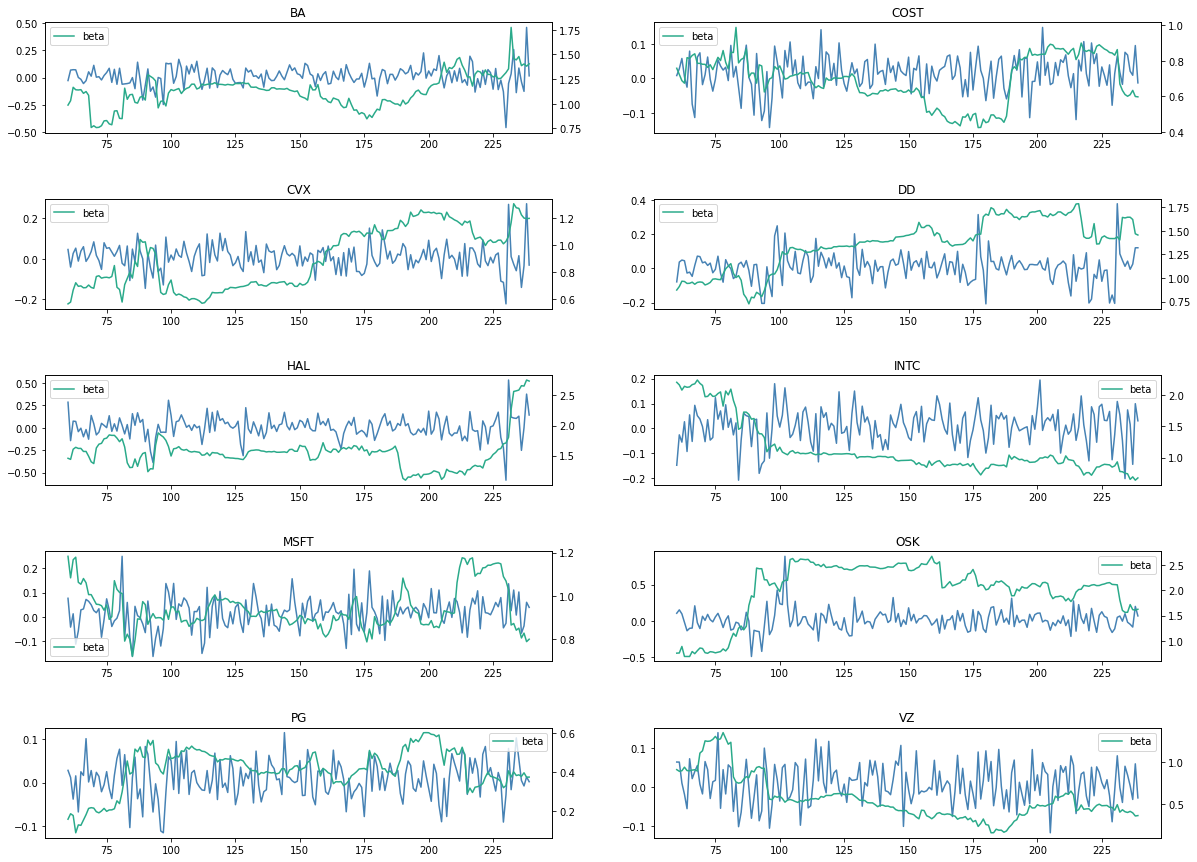

In [75]:
fig1 = plt.figure()

for i in range(1, 11):
    stock = tickers[i-1]
    ax = fig1.add_subplot(5, 2, i)
    ax.set_title(stock)
    ax.plot(r.stocks[stock][60:], color = '#4682B4', label = 'return')
    #ax.plot(r.estimated[stock][60:], color = '#4682B4', label = 'return')
    ax2 = ax.twinx()
    ax2.plot(beta_stocks[stock][60:], color = '#2AAA8A', label = 'beta')
    ax2.legend(loc = 'best')
    
c = 5.5

plt.rcParams['figure.figsize'] = (5*c, 2*c+2)
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.titlesize'] = 12
plt.subplots_adjust(wspace = 0.2, hspace = 0.6)


plt.show()

In general, there seems to be trade-off between the market beta and the return of each stock. This may imply that the higher the correlation between the performance of a specific stock and the market portfolio, the lower the realized return of that stock turns out to be.

Intuitively, as a stock entails more market risk, it is more exposed to the economy-wide risk; and thus, become less bountiful

#### Step 4: Empirical vs Estimated premium

##### Empirical risk premium

We calculate the emperical risk premium by using the sample averages

In [76]:
em_prem = pd.DataFrame(index = r.stocks.index)

In [77]:
for stock in tickers:
    em_prem[stock] = r.stocks[stock] - r.riskfree.rf

In [78]:
em_prem.columns = [['empirical']*len(tickers), tickers]
em_prem.head()

empirical                                                              \
         BA      COST       CVX        DD       HAL      INTC      MSFT   
0 -0.120536  0.151159 -0.020608 -0.102165  0.129376  0.223869  0.400881   
1  0.062187 -0.101264  0.032416  0.003583 -0.034193 -0.231467 -0.037744   
2 -0.109019 -0.064558  0.020304 -0.073115 -0.081775 -0.083453 -0.077771   
3  0.104846 -0.114534  0.095302  0.105849  0.171312  0.170257  0.234387   
4  0.016535  0.110089 -0.002403  0.030668  0.077841 -0.129379  0.017254   

                                 
        OSK        PG        VZ  
0  0.039094 -0.086549  0.097040  
1  0.061339 -0.022620 -0.103148  
2 -0.279263 -0.116735 -0.008718  
3  0.093558 -0.039614  0.120378  
4 -0.044483  0.065922 -0.007848

In [79]:
r = pd.merge(r, em_prem, left_index = True, right_index= True, how = 'outer')

In [80]:
#r.columns

##### Estimated risk premium

In [81]:
Gamma0 = np.array(gammas.gamma0[60:]).reshape(180, 1)
Gamma1 = np.array(gammas.gamma0[60:]).reshape(180, 1)
Betas = np.array(beta_stocks[60:]).reshape(180, 10)

est_prem = Gamma0 + Gamma1*Betas

est_prem = pd.DataFrame(est_prem, columns = tickers, index = range(60, 240))
est_prem.head(3)

#(np.array(gammas.gamma1[60:]).reshape(180, 1)*np.array(r.stocks[60:])).shape

,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ
60,0.133998,0.118669,0.105703,0.126336,0.165714,0.215931,0.147276,0.118345,0.078259,0.129026
61,0.124962,0.106151,0.097250,0.117536,0.150068,0.194458,0.128227,0.108179,0.073112,0.116498
62,0.074911,0.058393,0.057676,0.067982,0.090096,0.106341,0.074922,0.065232,0.040759,0.065645


In [82]:
est_prem.columns = [['estimated']*10, tickers]

In [83]:
r = pd.merge(r, est_prem, left_index = True, right_index = True, how = 'outer')

In [84]:
#r.info()

##### Testing statistical difference between empirical and estimated risk premium

Ploting the empirical and estimated risk premium

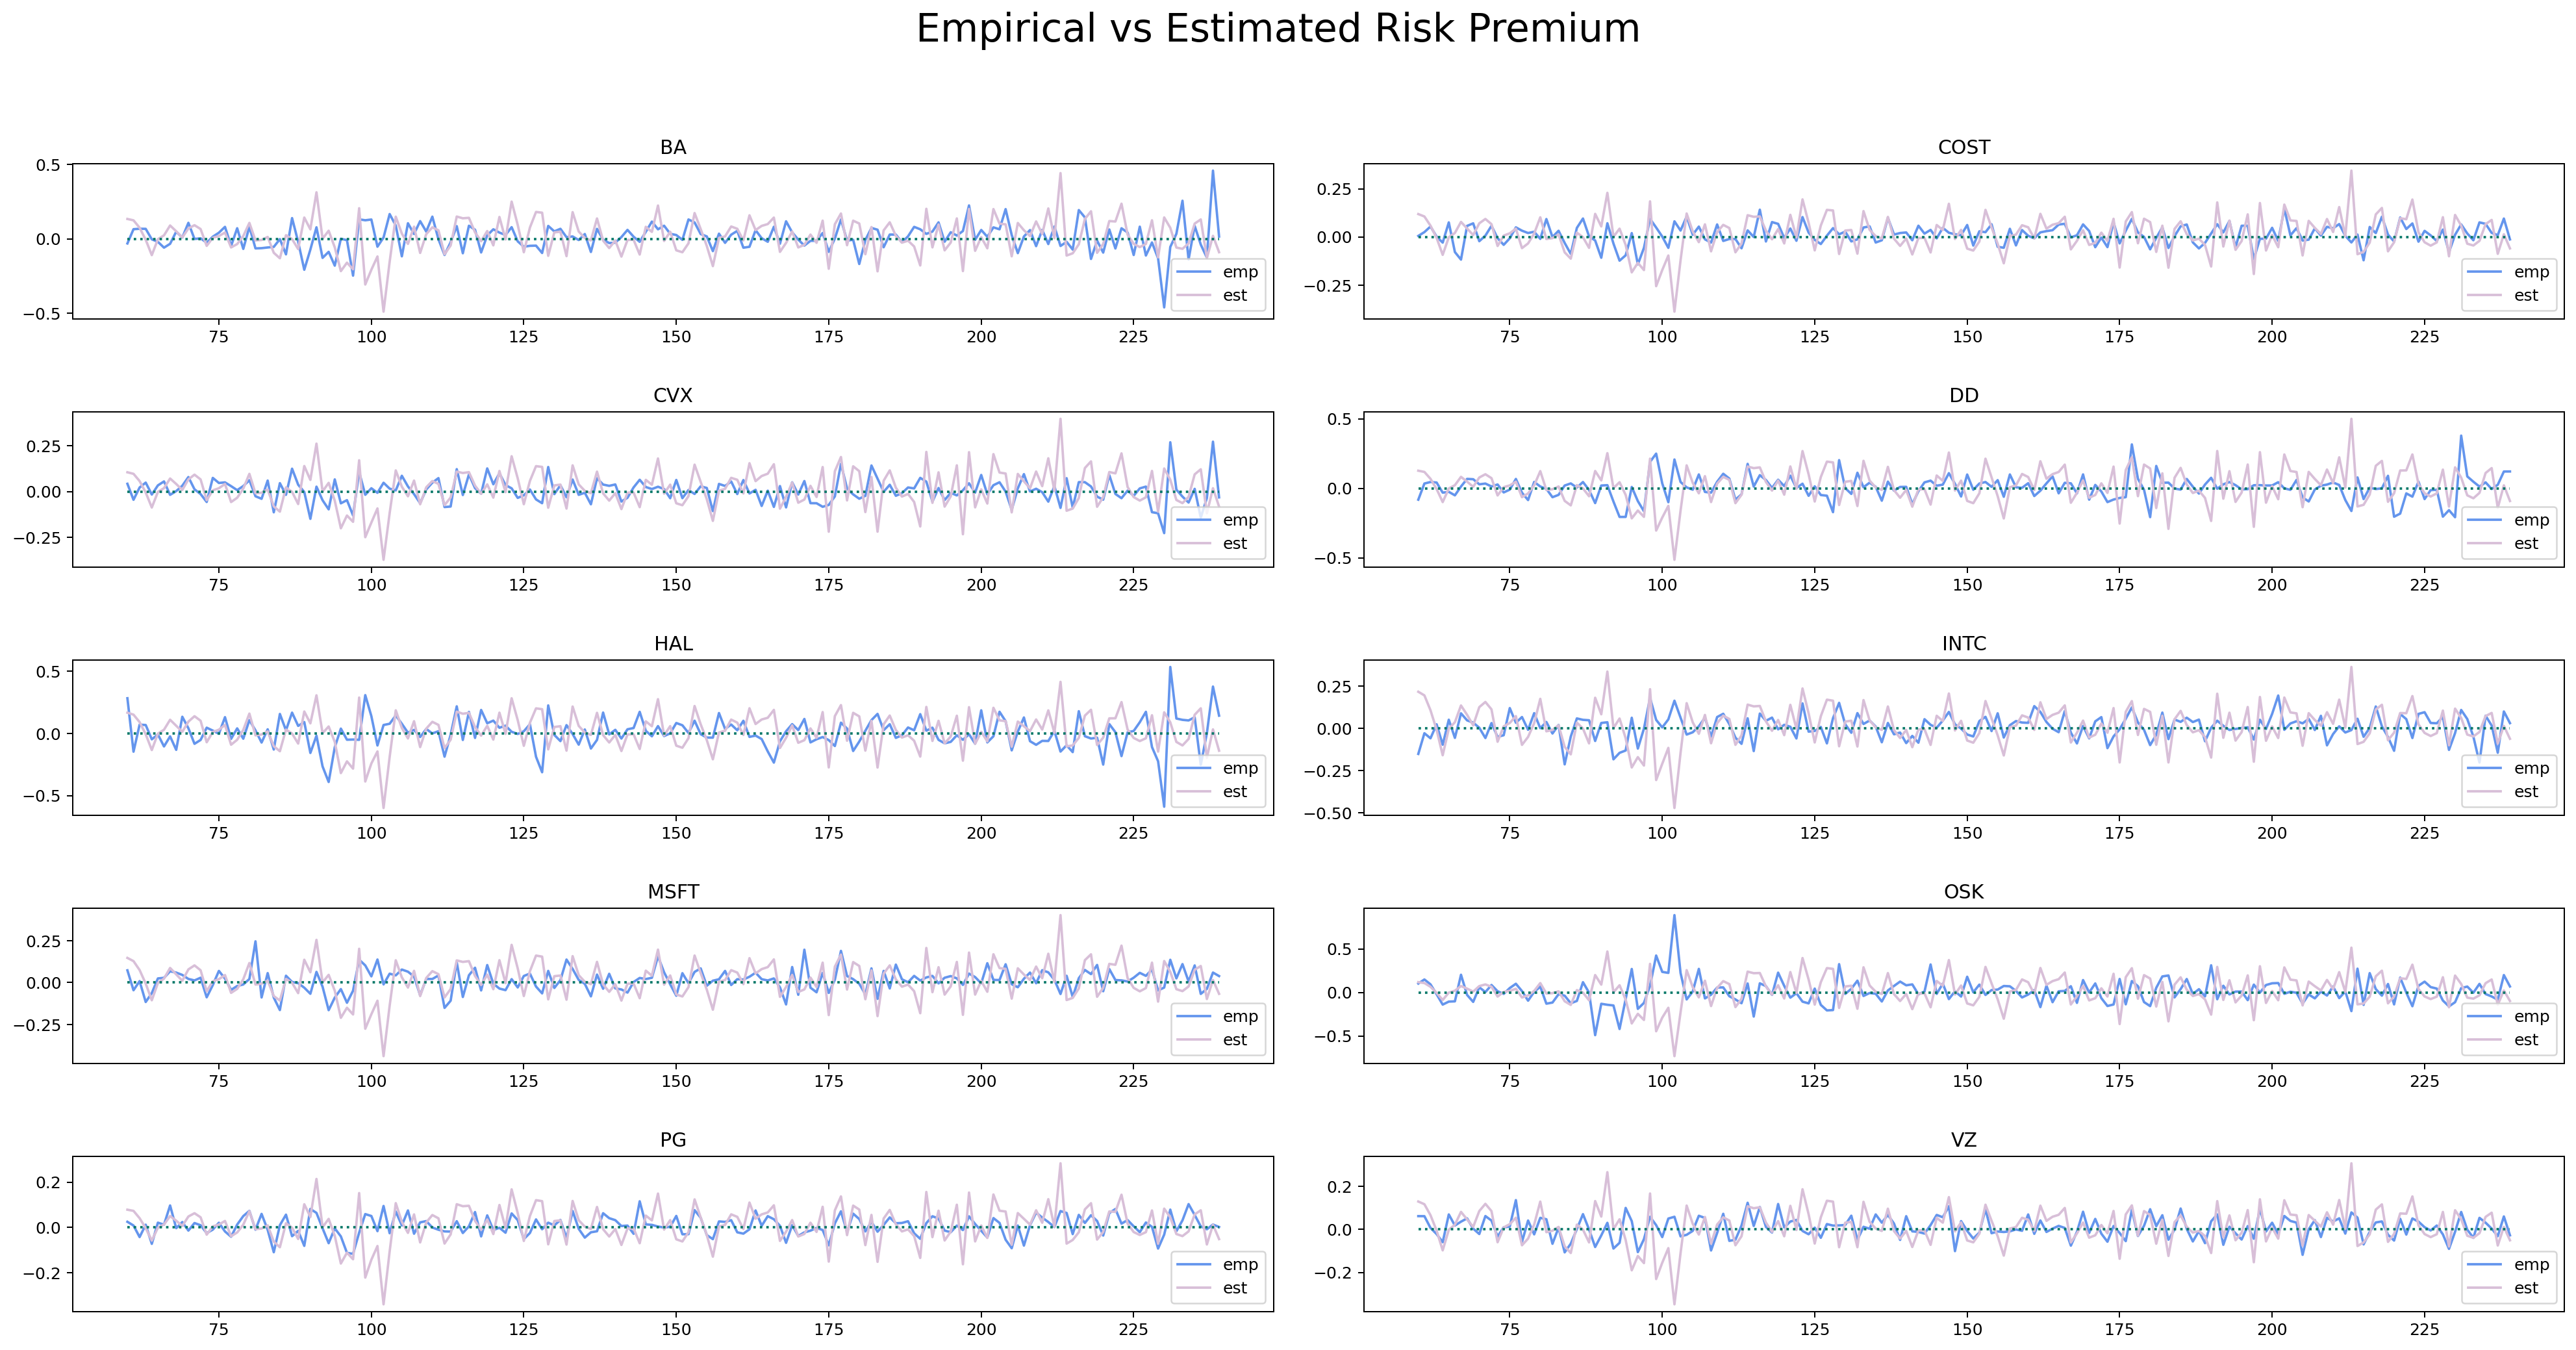

In [85]:
index180 = r.index[60:]
c = 5.5
fig = plt.figure(figsize=(5*c, 2*c+2), dpi = 180)
for i in range(1, 11):
    ax = fig.add_subplot(5, 2, i)
    ax.set_title(tickers[i-1])
    ax.plot(index180, r.empirical[tickers[i-1]].iloc[60:], color = '#6495ED', label = 'emp')
    ax.plot(index180, r.estimated[tickers[i-1]].iloc[60:], color = '#D8BFD8', label = 'est')
    ax.plot(index180, np.zeros((180,1)), color = '#097969', linestyle = ':')
    ax.legend(loc = 'lower right')

#plt.rcParams["figure.figsize"] = (5*c, 2*c+2)
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams['axes.titlesize'] = 14
fig.suptitle('Empirical vs Estimated Risk Premium', fontsize = 24)
plt.subplots_adjust(wspace = 0.075, hspace = 0.6)
plt.show()

__Statistical Test for the Significance of the Difference Between the Mean of the 2 Series__

Elements of the tests:
1. _Null hypothesis_: The means of the two series are not significantly different
2. _Alternative hypothesis_: The means of the two series are significantly different
3. _Test Statistics_: t-score for 2 independent samples
4. _Rejection region_: 5% type I error 

In [98]:
ttest_result = pd.DataFrame(np.full((1,20), np.nan), columns = [sorted(['tscore', 'pval']*10), tickers*2], index = [0])

for stock in tickers:
    ttest_result.tscore[stock].iat[0] = stats.ttest_ind(r.empirical[stock][60:], r.estimated[stock][60:]).statistic
    ttest_result.pval[stock].iat[0] = stats.ttest_ind(r.empirical[stock][60:], r.estimated[stock][60:]).pvalue

C:\Users\oanht\anaconda3\lib\site-packages\pandas\core\series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)


In [99]:
ttest_result.pval

,BA,COST,CVX,DD,HAL,INTC,MSFT,OSK,PG,VZ
0,0.561232,0.919149,0.275436,0.214018,0.346599,0.304672,0.838418,0.466382,0.50297,0.4813


Based on the returned p-values, we cannot reject the hypothesis that the difference between empirical and estimated series is statistically significant.

In other words, the pricing does not perform well. There is a significant mispricing

---
### Question 2: Correlation between Risk Premium and Book Value & Market Value

We build the _cross-section regression_ as follow
$${r_{i,t} - r_{f,t} = \gamma_{0, t} + \gamma_{1, t}*\hat{\beta}_{im, t} + \gamma_{2, t}*ln(ME)_{i, t} + \gamma_{3, t}*(\frac{BE}{ME}) + \delta_{i, t}}$$

#### Percentage Change in the Market Value of Equity 
$$ln(ME)_{i, t} = ln(\frac{ME_{i, t}}{ME_{i, t-1}})$$

In [100]:
lnMe = me.pct_change()
lnMe[60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 60 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      180 non-null    float64
 1   COST    180 non-null    float64
 2   CVX     180 non-null    float64
 3   DD      180 non-null    float64
 4   HAL     180 non-null    float64
 5   INTC    180 non-null    float64
 6   MSFT    180 non-null    float64
 7   OSK     180 non-null    float64
 8   PG      180 non-null    float64
 9   VZ      180 non-null    float64
dtypes: float64(10)
memory usage: 14.2 KB


#### Ratio of Book Value over Market Value

In [101]:
bmratio = be/me
bmratio[60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 60 to 239
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      180 non-null    float64
 1   COST    180 non-null    float64
 2   CVX     180 non-null    float64
 3   DD      180 non-null    float64
 4   HAL     180 non-null    float64
 5   INTC    180 non-null    float64
 6   MSFT    180 non-null    float64
 7   OSK     180 non-null    float64
 8   PG      180 non-null    float64
 9   VZ      180 non-null    float64
dtypes: float64(10)
memory usage: 14.2 KB


#### 2.1. Three factor regression
$${r_{i,t} - r_{f,t} = \gamma_{0, t} + \gamma_{1, t}*\hat{\beta}_{im, t} + \gamma_{2, t}*ln(ME)_{i, t} + \gamma_{3, t}*(\frac{BE}{ME}) + \delta_{i, t}}$$

In [102]:
params = pd.DataFrame(index = r.index, columns = ['gamma0', 'gamma1', 'gamma2', 'gamma3'])

In [103]:
import statsmodels.api as sma

In [150]:
for t in range(60, 240):
    rit = r.stocks[tickers].iloc[t]
    rft = r.riskfree['rf'].iloc[t]
    yt = rit - rft
    
    xt = pd.concat({'beta': beta_stocks.iloc[t],
                    'lnMe': lnMe.iloc[t],
                    'bmratio': bmratio.iloc[t]}, 
                   axis = 1)
    xt = sma.add_constant(xt)
    modelt = sma.OLS(yt, xt).fit()
    params.iloc[t] = modelt.params

C:\Users\oanht\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The result of the cross sectional regression is presented in `params` dataframe

In [151]:
for eachprm in params.columns:
    params[eachprm] = pd.to_numeric(params[eachprm])

In [152]:
params[60:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 60 to 239
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gamma0  180 non-null    float64
 1   gamma1  180 non-null    float64
 2   gamma2  180 non-null    float64
 3   gamma3  180 non-null    float64
dtypes: float64(4)
memory usage: 7.0 KB


In [153]:
params.mean()

gamma0    0.008526
gamma1    0.002302
gamma2    0.742208
gamma3   -0.162805
dtype: float64

#### 2.2. Testing Statistical Significance of the parameters

In [109]:
import statsmodels as sm

In [154]:
ttest_params = {}

for i in range(4):
    ttest_params['gamma' + str(i)]\
    = pd.Series(sm.stats.weightstats.ttest_ind(params['gamma' + str(i)].iloc[60:],\
                                               np.zeros((params['gamma'+str(i)].iloc[60:].shape))),
               index = ['tstat', 'pval', 'df'])

In [155]:
ttest_params = pd.DataFrame(ttest_params)
ttest_params

,gamma0,gamma1,gamma2,gamma3
tstat,1.718284,0.454916,3.105136e+01,-1.522576
pval,0.086609,0.649446,1.338007e-103,0.128748
df,358.000000,358.000000,3.580000e+02,358.000000


As can be seen in the test result, only `gamma2` is statisticaly significant. That means that only the percentage change in the market value of equity is significant to the risk premium

---

## Question 3 - Correlation between Market Value and/or Book Value and Risk Premium

### 3.1 Percentage change in market value & Risk premium

In [187]:
params31 = pd.DataFrame(columns = ['gamma0', 'gamma1'], index = r.index)
params31.head(3)

,gamma0,gamma1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


Cross section regression

In [188]:
for t in range(60, 240):
    yt = r.stocks.loc[t, tickers] - r.riskfree.loc[t, 'rf']
    
    xt = pd.DataFrame({'lnMe':lnMe.iloc[t]})
    xt = sma.add_constant(xt)
    
    modelt = sma.OLS(yt, xt).fit()
    
    params31.iloc[t] = modelt.params                      
                        

C:\Users\oanht\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [191]:
params31 = params31.loc[60:]
params31

,gamma0,gamma1
60,0.015175,0.879378
61,-0.002722,0.932873
62,-0.004421,0.913467
63,-0.009348,0.790926
64,-0.040058,0.418128
...,...,...
235,-0.000441,0.735971
236,-0.004335,0.993425
237,0.000956,0.624844
238,0.034201,0.55718


In [193]:
ttest_params31 = {}

for i in range(2):
    ttest_params31['gamma' + str(i)]\
    = pd.Series(sm.stats.weightstats.ttest_ind(params31['gamma' + str(i)].iloc[60:],\
                                               np.zeros((params31['gamma'+str(i)].iloc[60:].shape))),
               index = ['tstat', 'pval', 'df'])

In [194]:
ttest_params31 = pd.DataFrame(ttest_params31)
ttest_params31

,gamma0,gamma1
tstat,2.937864,2.546438e+01
pval,0.003629,6.654740e-70
df,238.000000,2.380000e+02


---
## Draft

In [120]:
xt1 = beta_stocks.iloc[60]
xt2 = lnMe.iloc[60]
xt3 = bmratio.iloc[60]

In [131]:
xt = pd.concat({'beta':xt1, 
                'lnME': xt2, 
                 'ratio': xt3},
                axis = 1)
xt

,beta,lnME,ratio
BA,0.986170,-0.027477,0.007629
COST,0.758969,0.008490,0.033038
CVX,0.566781,-0.027477,0.038851
DD,0.872612,-0.027477,0.021730
HAL,1.456278,0.285023,0.007735
INTC,2.200629,-0.153617,0.024990
MSFT,1.182982,0.076482,0.011799
OSK,0.754167,-0.027477,0.017565
PG,0.159983,-0.020241,0.027771
VZ,0.912475,0.113864,0.043878


In [122]:
yt = r.stocks[tickers].iloc[60] - r.market['rm'].iloc[60]
yt

BA     -0.066443
COST   -0.030476
CVX     0.007009
DD     -0.117789
HAL     0.246057
INTC   -0.187404
MSFT    0.037516
OSK     0.066887
PG     -0.010804
VZ      0.025609
Name: 60, dtype: float64

In [144]:
xt = sma.add_constant(xt)
m = sma.OLS(yt, xt)
m = m.fit()

C:\Users\oanht\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [145]:
m.params

const    0.046766
beta    -0.040516
lnME     0.847642
ratio   -1.140421
dtype: float64

In [140]:
print(m.summary())

                                 OLS Regression Results                                
Dep. Variable:                     60   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              9.677
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                     0.00693
Time:                        16:22:31   Log-Likelihood:                          16.052
No. Observations:                  10   AIC:                                     -26.10
Df Residuals:                       7   BIC:                                     -25.20
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\oanht\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
